# Tensorflow 예제

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

W = tf.Variable(tf.random_uniform([1], -100, 100)) # -100, 100사이의 수 중 랜덤 값
b = tf.Variable(tf.random_uniform([1], -100, 100))

X = tf.placeholder(tf.float32) # 틀을 만들어주자.
Y = tf.placeholder(tf.float32)

In [23]:
H = W * X + b # 가설식
cost = tf.reduce_mean(tf.square(H - Y)) # 비용함수 = (이상치 - 실제값)^2 의 평균
a = tf.Variable(0.01) # 하강 알고리즘에서 한번에 0.01 씩 점프
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost) # 비용함수를 가장 적게 만드는 방법으로 학습
init = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session() # 세션
sess.run(init)

In [24]:
for i in range(5001): # 실제로 학습이 일어나는 부분
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
        
        
print(sess.run(H, feed_dict={X:[8]}))

0 4587027500.0 [10400.712] [1989.3468]
500 8684589.0 [25539.973] [1938.0432]
1000 8633757.0 [25627.865] [1502.8136]
1500 8632673.0 [25640.67] [1439.395]
2000 8632653.0 [25642.54] [1430.1483]
2500 8632651.0 [25642.807] [1428.8147]
3000 8632650.0 [25642.844] [1428.6322]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]
[206571.39]


# Tensorflow 변수와 상수

### 상수

In [32]:
a = tf.constant(1) # tensor 자료형을 반환한다. tensor는 배열과 비슷
b = tf.constant(2)
c = tf.add(a, b)
sess.run(c) # 세션을 만들어 실행 시켜준다.

3

### 변수

In [34]:
a = tf.Variable(5)
b = tf.Variable(3)
c = tf.multiply(a, b)

init = tf.global_variables_initializer() # 변수를 항상 초기화 시켜줘야한다.
sess = tf.Session()
sess.run(init)
sess.run(c)

15

In [40]:
a = tf.Variable(15)
c = tf.multiply(a, b)
init = tf.global_variables_initializer() # 변수값이 바뀌었기 때문에 다시 초기화를 시켜주어야 한다.
sess.run(init)
sess.run(c)

45

# Placeholder

- 학습 데이터를 포함하는 변수
- 플레이스홀더는 다음과 같은 문법으로 사용할 수 있다.
    - tf.placeholder(dtype, shape, name) 
        - dtype: 플레이스 홀더에 저장되는 자료형을 의미
        - shape: 배열의 차원을 의미
        - name: 플레이스 홀더의 이름을 의미

In [41]:
input = [1, 2, 3, 4, 5]

In [42]:
x = tf.placeholder(dtype=tf.float32)
y = x + 5

In [43]:
sess = tf.Session()

In [44]:
sess.run(y, feed_dict={x: input})

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

In [49]:
mathScore = [40, 50, 20, 80, 99]
englishScore = [59, 80, 99, 98, 20]

a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)

y = (a + b) / 2

In [50]:
sess = tf.Session()
sess.run(y, feed_dict={a: mathScore, b: englishScore})

array([49.5, 65. , 59.5, 89. , 59.5], dtype=float32)

# Tensorflow 주요 함수

In [5]:
a = tf.constant(17)
b = tf.constant(5)

In [8]:
# 덧셈 함수 사용하기
sess = tf.Session()
c = tf.add(a, b)
sess.run(c)

22

In [9]:
# 뺄셈 함수 사용하기
c = tf.subtract(a, b)
sess.run(c)

12

In [12]:
# 곱셈 함수 사용하기
c = tf.multiply(a, b)
sess.run(c)

85

In [14]:
# 나눗셈 함수 사용하기
c = tf.truediv(a, b)
sess.run(c)

3.4

In [17]:
# 나머지 함수 사용하기
c = tf.mod(a, b)
sess.run(c)

2

In [20]:
# 절대값 함수 사용하기
c = tf.abs(-a)
sess.run(c)

17

In [22]:
a = tf.constant(17.5)
b = tf.constant(5.0)

In [23]:
# 음수 함수
c = tf.negative(a)
sess.run(c)

-17.5

In [25]:
# 부호 함수
c = tf.sign(-a)
sess.run(c)

-1.0

In [26]:
# 제곱 함수
c = tf.square(a)
sess.run(c)

306.25

In [30]:
# 거듭 제곱 함수
c = tf.pow(a, 10)
sess.run(c)

2693894000000.0

In [33]:
# 최대값 함수
c = tf.maximum(a, b)
sess.run(c)

17.5

In [34]:
# 최소값 함수
c = tf.minimum(a, b)
sess.run(c)

5.0

In [36]:
# 지수값 함수
c = tf.exp(b)
sess.run(c)

148.41316

In [37]:
# 로그값 함수
c = tf.log(b)
sess.run(c)

1.609438

In [38]:
# sin 함수
c = tf.sin(b)
sess.run(c)

-0.9589243

In [39]:
# con 함수
c = tf.cos(b)
sess.run(c)

0.2836622

# Tensorflow Session

- Tensorflow는 방향 그래프를 기반으로 하여 설계된 기계학습 라이브러리이다.

In [43]:
a = tf.constant(17.5)
b = tf.constant(5.0)

In [48]:
c = tf.add(a, b)
print(c) # c는 Tensor객체 그 자체이다. 텐서플로우에서 데이터의 처리 단위는 텐서이다. 일종의 다차원 배열의 객체라고 이해할 수 있다.

Tensor("Add_10:0", shape=(), dtype=float32)


In [51]:
# 연산을 수행하기 위해서는 세션(Session)을 사용해야 한다.
sess = tf.Session()
sess.run(c)

22.5

# 파이썬 빅 데이터(Big Data) K-평균(K-means)

- 클러스터링(Clustering)이란 여러 개의 데이터가 있을 때 데이터를 군집화하는 것을 의미한다.
- K-means 알고리즘은 대표적인 비지도학습(Unsupervised Learning) 알고리즘이다.

- K-means 사전 준비
    1. 클러스터링을 수행할 데이터의 주제를 결정한다.(수학 학원에서 학생들의 성적에 따라 반을 구분하기)
    2. 얼마나 많은 클러스터를 만들지 고민해야 한다.(고급반, 중급반, 초급반, ...)
    3. 데이터를 준비한다.(데이터가 정확할수록 유리하다.)
    4. 클러스터링을 수행하기 위한 방법은 다양하다.(무작위 중심(Centroid) 값 선택, K-means++, ...)
    
- K-means 수행 과정
    1. 중심(Centroid)에 가까운 클러스터에 포함시킨다.
    2. 중심(Centroid)을 클러스터의 중앙으로 이동시킨다.
    
- K-means는 위 두 과정을 반복수행하면 된다. 그러면 결과적으로 완전하게 군집화된 클럿터들을 얻을 수 있다. 더이상 중심(Centroid)의 위치가 변하지 않을 때까지 반복하는 것이 일반적이다.

# 빅 데이터 K 평균(K-Means) 구현하기

- 파이썬 빅 데이터 분석에 있어서 가장 많이 활용되는 라이브러리 3대장은 Pandas, Numpy, Matplotlib 이다.
    - Numpy : 연산 처리를 용이하게 하기 위해 사용
    - Pandas : 데이터 포인트를 만들기 위해 사용
    - Matplotlib : 데이터 시각화를 위해 사용

In [52]:
from sklearn.cluster import KMeans

In [53]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.DataFrame(columns=['x', 'y'])

In [55]:
df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]
df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]
df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

In [58]:
df.head(30)

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.29999999999999716, 0.5, 'y')

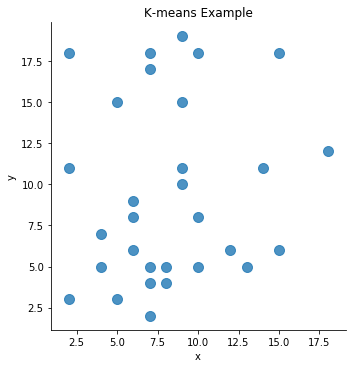

In [61]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [64]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)
kmeans.cluster_centers_

array([[11.14285714,  7.28571429],
       [ 6.375     , 16.375     ],
       [ 5.83333333,  5.08333333],
       [15.66666667, 13.66666667]])

In [65]:
kmeans.labels_

array([2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 0, 3, 3], dtype=int32)

In [66]:
df['cluster'] = kmeans.labels_
df.head(30)

,x,y,cluster
0,2,3,2
1,2,11,1
2,2,18,1
3,4,5,2
4,4,7,2
5,5,3,2
6,5,15,1
7,6,6,2
8,6,8,2
9,6,9,2


Text(27.176848958333338, 0.5, 'y')

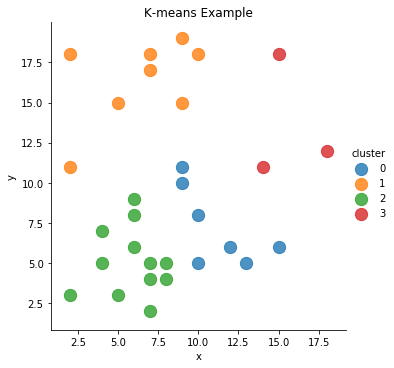

In [67]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')